In [6]:
# Cell 1: Verify your tiny dataset
from pathlib import Path
import yaml

data_yaml = Path.home() / "calorie_estimator" / "datasets" / "food-101-tiny-yolo" / "data.yaml"

# Check dataset
with open(data_yaml) as f:
    data_config = yaml.safe_load(f)

print("Dataset Configuration:")
print(f"  Path: {data_config['path']}")
print(f"  Classes: {data_config['nc']}")
print(f"  Class names: {data_config['names']}")

# Count images
train_img_dir = Path(data_config['path']) / data_config['train']
val_img_dir = Path(data_config['path']) / data_config['val']

train_count = len(list(train_img_dir.glob('*.jpg'))) + len(list(train_img_dir.glob('*.png')))
val_count = len(list(val_img_dir.glob('*.jpg'))) + len(list(val_img_dir.glob('*.png')))

print(f"  Training images: {train_count}")
print(f"  Validation images: {val_count}")
print(f"  Total: {train_count + val_count}")

Dataset Configuration:
  Path: /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo
  Classes: 10
  Class names: ['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']
  Training images: 1500
  Validation images: 500
  Total: 2000


In [ ]:
# Cell 2: OPTIMIZED TRAINING for Mac M4 Pro (24GB RAM)
from ultralytics import YOLO
from pathlib import Path
import torch

# Verify MPS (Metal Performance Shaders) is available
print("="*70)
print("SYSTEM CHECK")
print("="*70)
print(f"PyTorch version: {torch.__version__}")
print(f"MPS available: {torch.backends.mps.is_available()}")
print(f"MPS built: {torch.backends.mps.is_built()}")
print("="*70)

# Load pre-trained YOLOv11m as base model
print("\nLoading YOLOv11m base model...")
model = YOLO('yolo11m.pt')  # This downloads if not present

print(f"✓ Base model loaded: yolo11m.pt")
print(f"✓ Original classes: {len(model.names)}")
print(f"✓ Device: {model.device}")

# Paths
data_yaml = Path.home() / "calorie_estimator" / "datasets" / "food-101-tiny-yolo" / "data.yaml"
output_dir = Path.home() / "calorie_estimator" / "models"
output_dir.mkdir(exist_ok=True)

print("\n" + "="*70)
print("TRAINING CONFIGURATION - OPTIMIZED FOR MAC M4 PRO (24GB)")
print("="*70)
print("Hardware:")
print("  CPU: 12 cores (8 performance + 4 efficiency)")
print("  RAM: 24 GB")
print("  GPU: Apple M4 Pro (MPS)")
print("\nHyperparameters:")
print("  Base model: yolo11m.pt")
print("  Batch size: 24 (optimal for 24GB RAM)")
print("  Workers: 8 (optimal for 12 cores)")
print("  Image size: 640")
print("  Epochs: 100 (with early stopping)")
print("  Learning rate: 0.001 → 0.0001 (cosine)")
print("="*70)

# TRAIN with optimized parameters
results = model.train(
    data=str(data_yaml),
    epochs=50,
    imgsz=640,
    batch=16,
    patience=15,
    save=True,
    device='mps',
    project=str(output_dir),
    name='food101_tiny_yolo11m_optimized',
    pretrained=True,
    optimizer='AdamW',
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    cos_lr=True,
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,
    mixup=0.1,
    # cache='ram',
    workers=8,
    amp=True,
    verbose=True,
    close_mosaic=10,
)

print("\n" + "="*70)
print("✓ TRAINING COMPLETE!")
print("="*70)
print(f"Best model: {output_dir / 'food101_tiny_m4pro' / 'weights' / 'best.pt'}")
print(f"Last model: {output_dir / 'food101_tiny_m4pro' / 'weights' / 'last.pt'}")
print(f"Results: {output_dir / 'food101_tiny_m4pro' / 'results.png'}")
print("="*70)

SYSTEM CHECK
PyTorch version: 2.9.0
MPS available: True
MPS built: True

Loading YOLOv11m base model...
✓ Base model loaded: yolo11m.pt
✓ Original classes: 80
✓ Device: cpu

TRAINING CONFIGURATION - OPTIMIZED FOR MAC M4 PRO (24GB)
Hardware:
  CPU: 12 cores (8 performance + 4 efficiency)
  RAM: 24 GB
  GPU: Apple M4 Pro (MPS)

Hyperparameters:
  Base model: yolo11m.pt
  Batch size: 24 (optimal for 24GB RAM)
  Workers: 8 (optimal for 12 cores)
  Image size: 640
  Epochs: 100 (with early stopping)
  Learning rate: 0.001 → 0.0001 (cosine)
Ultralytics 8.3.221 🚀 Python-3.13.9 torch-2.9.0 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/data.yaml, degrees=10, deterministic=True, device=mps, df

Data configuration:
  Classes: 10
  Names: ['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']
  Path: /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo

Sample image: ramen_1586565.jpg
Label content: 7 0.5 0.5 1.0 1.0


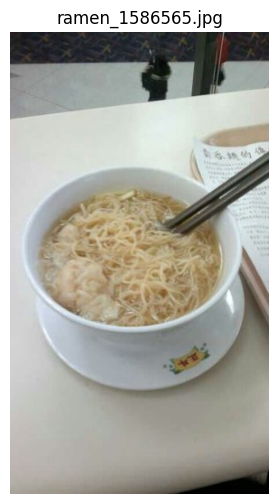

Image size: (287, 512)


In [3]:
# Cell 3: Verify the conversion
import yaml
from PIL import Image
import matplotlib.pyplot as plt

# Load data.yaml
with open(data_yaml_path) as f:
    data_config = yaml.safe_load(f)

print("Data configuration:")
print(f"  Classes: {data_config['nc']}")
print(f"  Names: {data_config['names']}")
print(f"  Path: {data_config['path']}")

# Check a sample image and label
train_img_dir = Path(data_config['path']) / data_config['train']
train_imgs = list(train_img_dir.glob('*.jpg'))

if train_imgs:
    sample_img = train_imgs[0]
    print(f"\nSample image: {sample_img.name}")
    
    # Check corresponding label
    label_file = Path(data_config['path']) / 'labels' / 'train' / f"{sample_img.stem}.txt"
    if label_file.exists():
        with open(label_file) as f:
            print(f"Label content: {f.read().strip()}")
    
    # Display image
    img = Image.open(sample_img)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(sample_img.name)
    plt.axis('off')
    plt.show()
    print(f"Image size: {img.size}")

In [4]:
# Cell 4: Train YOLOv11m on tiny dataset
from ultralytics import YOLO
from pathlib import Path

# Load model
model = YOLO('yolo11m.pt')

# Paths
data_yaml = Path.home() / "calorie_estimator" / "datasets" / "food-101-tiny-yolo" / "data.yaml"
output_dir = Path.home() / "calorie_estimator" / "models"

print("="*60)
print("TRAINING ON TINY DATASET")
print("="*60)
print(f"Model: YOLOv11m")
print(f"Dataset: Food-101-Tiny (10 classes)")
print(f"Device: {model.device}")
print("="*60)

# Train with settings optimized for small dataset
results = model.train(
    data=str(data_yaml),
    epochs=30,                    # Fewer epochs for tiny dataset
    imgsz=640,                    
    batch=16,                     # Can use larger batch with fewer images
    patience=10,                  
    save=True,                    
    device='mps',                 
    project=str(output_dir),      
    name='food101_tiny_yolo11m',  # Different name
    pretrained=True,              
    optimizer='AdamW',            
    lr0=0.001,                    
    augment=True,                 
    cache='ram',                  # Can cache small dataset in RAM
    workers=6,                    
    verbose=True,
)

print("\n" + "="*60)
print("✓ Training Complete!")
print("="*60)
best_model = output_dir / 'food101_tiny_yolo11m' / 'weights' / 'best.pt'
print(f"Best model: {best_model}")

TRAINING ON TINY DATASET
Model: YOLOv11m
Dataset: Food-101-Tiny (10 classes)
Device: cpu
Ultralytics 8.3.221 🚀 Python-3.13.9 torch-2.9.0 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=food101_tiny_yolo11m, n

/opt/anaconda3/envs/calorie_estimator/lib/python3.13/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Plotting labels to /Users/jasonzhang/calorie_estimator/models/food101_tiny_yolo11m/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/jasonzhang/calorie_estimator/models/food101_tiny_yolo11m
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/30      16.7G     0.2111      1.862     0.9816         41        640: 100% ━━━━━━━━━━━━ 94/94 0.4it/s 3:322.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 0.4it/s 40.3s2.2ss
                   all        500        500      0.369      0.404      0.253      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/30      15.8G      0.221      1.559       0.96         36        640: 100% ━━━━━━━

Model classes: {0: 'apple_pie', 1: 'bibimbap', 2: 'cannoli', 3: 'edamame', 4: 'falafel', 5: 'french_toast', 6: 'ice_cream', 7: 'ramen', 8: 'sushi', 9: 'tiramisu'}

image 1/1 /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/images/val/edamame_168493.jpg: 640x640 1 edamame, 138.3ms
Speed: 1.7ms preprocess, 138.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


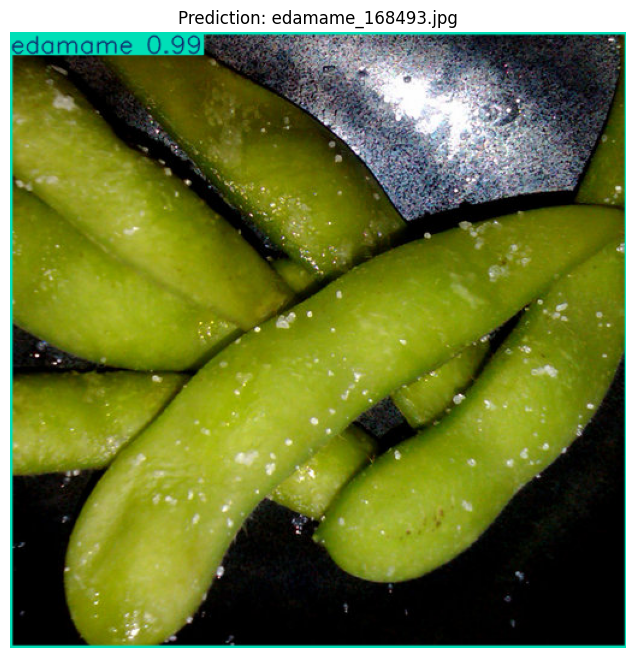

  edamame: 99.44%


image 1/1 /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/images/val/cannoli_129808.jpg: 480x640 1 cannoli, 1 french_toast, 84.8ms
Speed: 0.9ms preprocess, 84.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


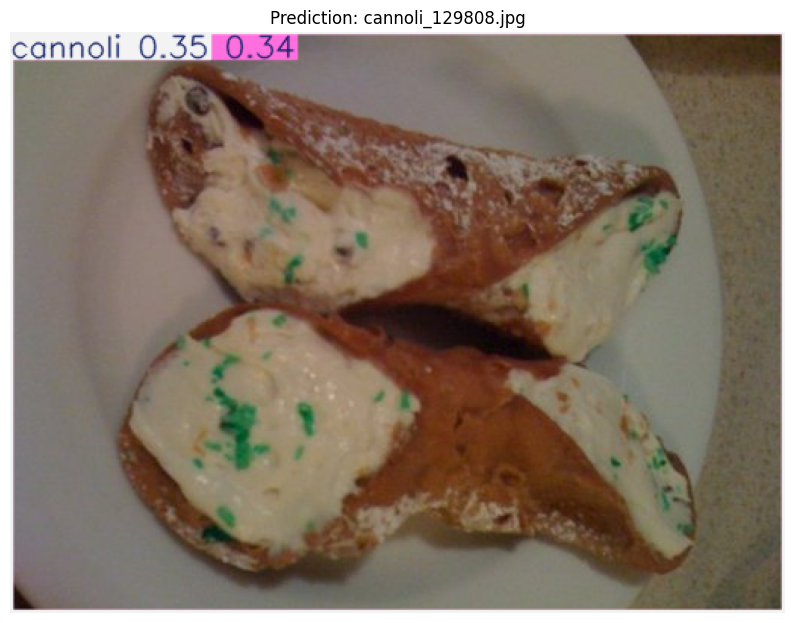

  cannoli: 35.42%
  french_toast: 34.37%


image 1/1 /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/images/val/bibimbap_1316695.jpg: 640x640 1 bibimbap, 100.9ms
Speed: 1.4ms preprocess, 100.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


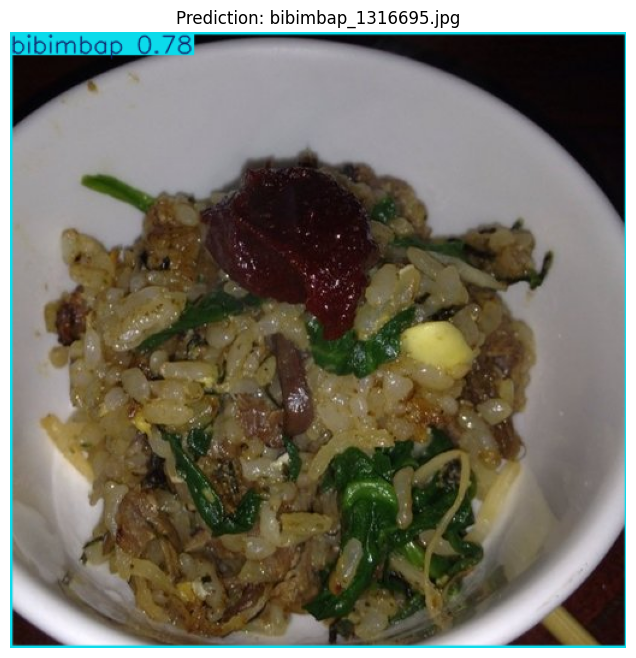

  bibimbap: 77.86%


image 1/1 /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/images/val/ramen_1542725.jpg: 640x640 1 ramen, 117.4ms
Speed: 1.0ms preprocess, 117.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


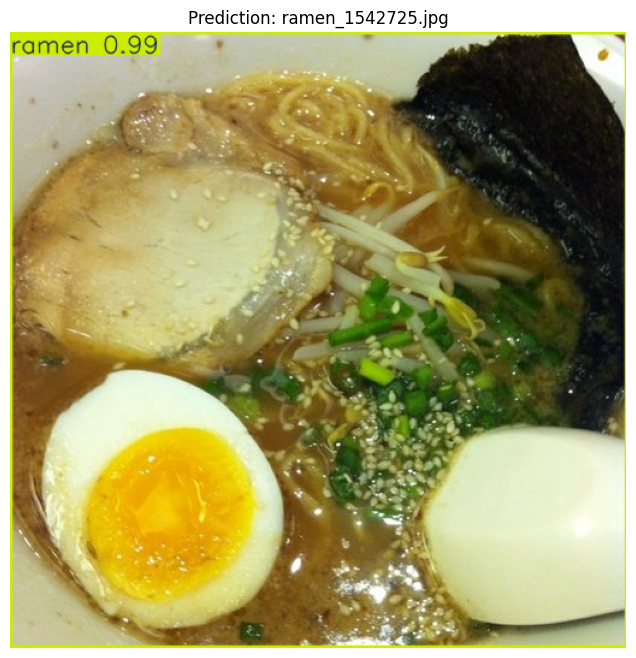

  ramen: 98.89%


image 1/1 /Users/jasonzhang/calorie_estimator/datasets/food-101-tiny-yolo/images/val/cannoli_1227927.jpg: 640x640 1 cannoli, 91.6ms
Speed: 0.9ms preprocess, 91.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


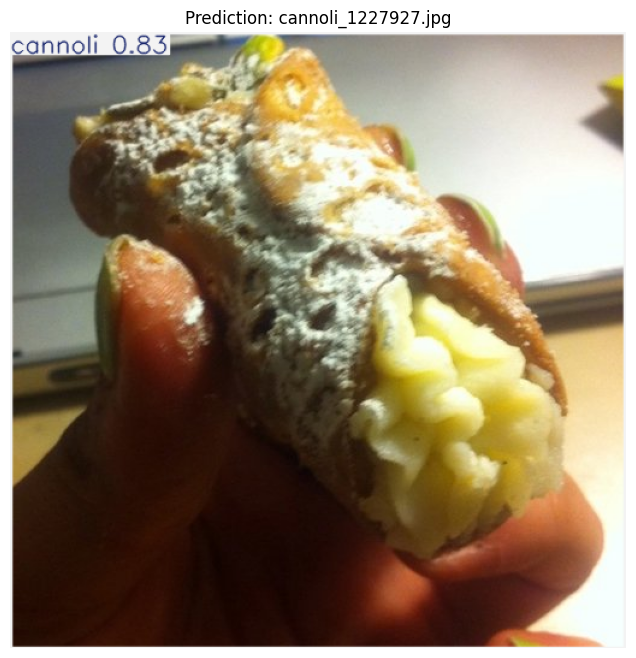

  cannoli: 82.99%



In [5]:
# Cell 5: Test trained model
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load trained model
model_path = Path.home() / "calorie_estimator" / "models" / "food101_tiny_yolo11m" / "weights" / "best.pt"
model = YOLO(model_path)

print(f"Model classes: {model.names}")

# Test on validation image
val_img_dir = Path.home() / "calorie_estimator" / "datasets" / "food-101-tiny-yolo" / "images" / "val"
test_images = list(val_img_dir.glob('*.jpg'))[:5]  # Test first 5

for img_path in test_images:
    results = model(str(img_path), conf=0.25)
    
    result = results[0]
    img_with_boxes = result.plot()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Prediction: {img_path.name}")
    plt.show()
    
    # Print detections
    for box in result.boxes:
        class_id = int(box.cls[0])
        class_name = result.names[class_id]
        confidence = float(box.conf[0])
        print(f"  {class_name}: {confidence:.2%}")
    print()